<a href="https://colab.research.google.com/github/Katonokatono/Term-Deposit-Project/blob/Hypothesis-Testing/Term_Deposit_Hypothesis_Testing_Module1_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Import right libraries

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Call required libraries

# To time processes
import time 

#To suppress warnings
import warnings

#Data manipulation         
import numpy as np           
import pandas as pd

#For graphics     
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# For scaling dataset
from sklearn.preprocessing import StandardScaler

#For clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

#For GMM clustering
from sklearn.mixture import GaussianMixture

# For os related operations
import os                    
import sys

In [2]:
#load the dataset
bank=pd.read_csv('/content/raw_data.csv')

#preview
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,yes


In [3]:
#preview the columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'term_deposit'],
      dtype='object')

In [4]:
#preview the data types
bank.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration         int64
term_deposit    object
dtype: object

In [5]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [6]:
#Turning off warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [7]:
bank.count()

age             41188
job             41188
marital         41188
education       41188
default         41188
housing         41188
loan            41188
contact         41188
month           41188
day_of_week     41188
duration        41188
term_deposit    41188
dtype: int64

i**.Nomality Test**

In [62]:
# Normality test 

from scipy.stats import shapiro

def shapiro_test(bank, col_list):
    for x in col_list:
        print(x)
        data = bank[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

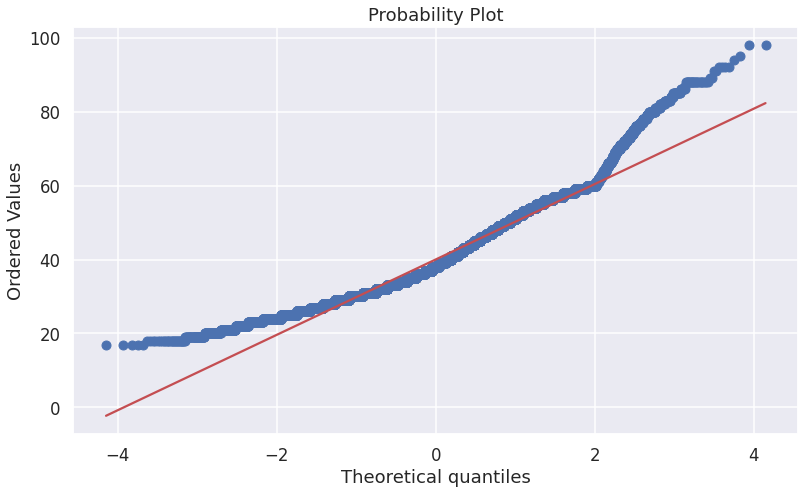

In [9]:
#use pp plot to check for nomality in age variable
import matplotlib.pyplot as plt
stats.probplot(bank['age'], plot= plt)
plt.show()

In [10]:
#shapiro Wilk's test
#check nomality test for age column

stat, p = shapiro(bank['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')


Statistics=0.957, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



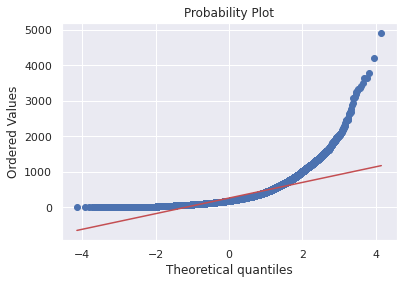

In [17]:
#use pp plot to check for nomality in age variable
import matplotlib.pyplot as plt
stats.probplot(bank['duration'], plot= plt)
plt.show()

In [11]:
#check nomality test for duration column
stat, p = shapiro(bank['duration'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.722, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



ii. **Sampling and Hypothesis Testing**

**Relationship between term_deposit and marital**

In [18]:
#Drop the unknown in marital columns
df_marital=bank.drop(bank.index[bank['marital'] == 'unknown'], inplace = True)
#preview the column for marital
bank['marital']

0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41108, dtype: object

In [19]:
# Stratified sample
df_marital= bank.groupby('marital', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

#preview 
df_marital

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,term_deposit
35292,60,retired,divorced,high.school,unknown,no,no,cellular,may,fri,781,no
19712,51,technician,divorced,professional.course,no,yes,no,cellular,aug,thu,158,no
24070,57,retired,divorced,university.degree,no,yes,no,telephone,nov,tue,21,no
31492,50,admin.,divorced,university.degree,no,yes,no,cellular,may,wed,335,no
27499,54,admin.,divorced,high.school,no,no,yes,cellular,nov,fri,377,no
...,...,...,...,...,...,...,...,...,...,...,...,...
10414,58,unemployed,single,basic.4y,unknown,no,no,telephone,jun,mon,170,no
26545,29,self-employed,single,university.degree,no,no,no,cellular,nov,thu,88,no
1391,29,admin.,single,high.school,no,no,no,telephone,may,thu,149,no
35404,28,services,single,basic.9y,no,no,yes,cellular,may,fri,126,no


In [20]:
table_marital= pd.crosstab(bank['marital'], bank['term_deposit'])
table_marital

term_deposit,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620


In [21]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_marital.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 5.991464547107979, Test statistic: 121.60529977368248
Alpha: 0.050000000000000044, p-value: 3.924141589479533e-27


p-value less than alpha, thus significant evidence to reject null hypothesis

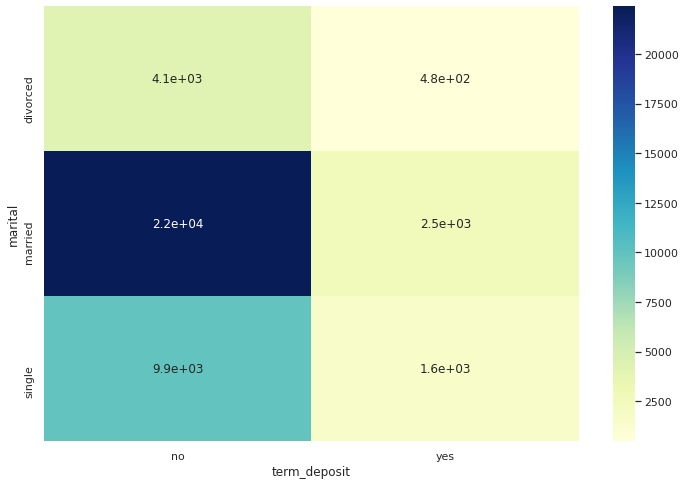

In [65]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(table_marital, annot=True, cmap="YlGnBu")

**Relationship between term_deposit and education**

In [22]:
#Relationship between Term deposit and Education

#Drop the unknown in marital columns
bank.drop(bank.index[bank['education'] == 'unknown'], inplace = True)

#preview the column for education
bank['education']

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 39386, dtype: object

In [23]:

# Stratified sample
df_education= bank.groupby('education', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

#preview
df_education


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,term_deposit
25431,43,self-employed,married,basic.4y,no,no,yes,cellular,nov,wed,206,no
39476,85,housemaid,married,basic.4y,unknown,yes,no,cellular,apr,tue,167,yes
32503,34,blue-collar,married,basic.4y,unknown,yes,no,cellular,may,fri,1094,no
37455,76,retired,married,basic.4y,no,no,no,cellular,aug,wed,331,no
8872,49,entrepreneur,married,basic.4y,unknown,no,no,telephone,jun,thu,285,no
...,...,...,...,...,...,...,...,...,...,...,...,...
16440,40,admin.,divorced,university.degree,no,unknown,unknown,cellular,jul,wed,145,no
17463,38,admin.,divorced,university.degree,no,no,no,cellular,jul,mon,101,no
31693,38,technician,married,university.degree,no,unknown,unknown,cellular,may,thu,86,no
4191,34,admin.,married,university.degree,no,yes,yes,telephone,may,mon,97,no


In [24]:
#education vs term_deposit
table_edu= pd.crosstab(bank['education'], bank['term_deposit'])
table_edu

term_deposit,no,yes
education,,
basic.4y,3743,427
basic.6y,2098,188
basic.9y,5566,471
high.school,8471,1030
illiterate,14,4
professional.course,4642,595
university.degree,10473,1664


In [25]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_edu.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 12.591587243743977, Test statistic: 175.63060241800403
Alpha: 0.050000000000000044, p-value: 2.8727636814613635e-35


p-value less than alpha, thus significant evidence to reject null hypothesis

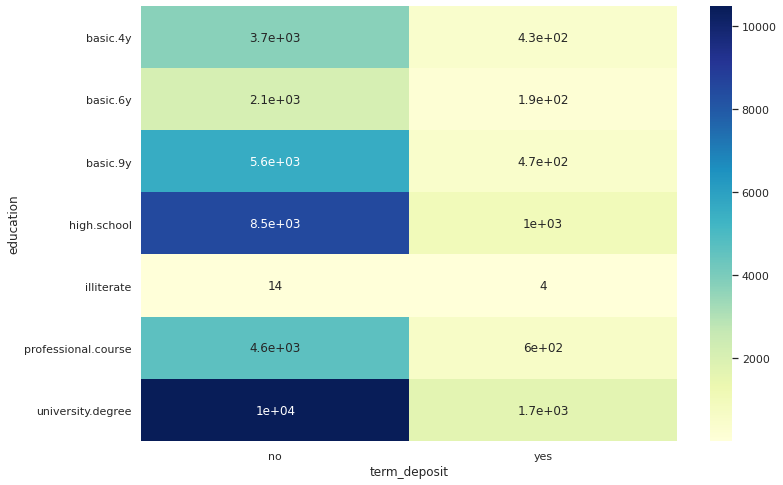

In [66]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(table_edu, annot=True, cmap="YlGnBu")

**Relationship between term_deposit and job**

In [27]:
#Drop the unknown in marital columns
bank.drop(bank.index[bank['job'] == 'unknown'], inplace = True)

#preview job column
bank['job']

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 39191, dtype: object

In [28]:
#job vs term_deposit
table_job= pd.crosstab(bank['job'], bank['term_deposit'])
table_job

term_deposit,no,yes
job,,
admin.,8847,1312
blue-collar,8177,611
entrepreneur,1277,119
housemaid,914,101
management,2490,308
retired,1217,400
self-employed,1240,147
services,3510,304
student,491,216


In [29]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_job.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 18.307038053275146, Test statistic: 819.5833643464897
Alpha: 0.050000000000000044, p-value: 1.2706458353488479e-169


p-value less than alpha, thus significant evidence to reject null hypothesis

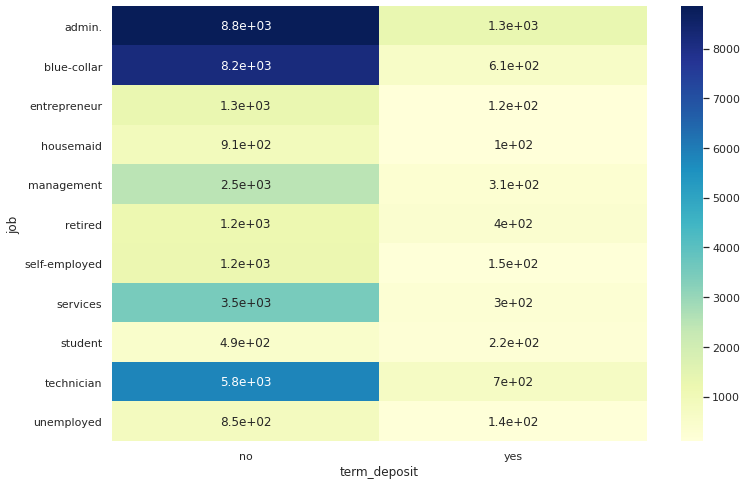

In [67]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(table_job, annot=True, cmap="YlGnBu")

Relationship between Loan and Term_deposit

In [30]:
#Drop the unknown in marital columns
bank.drop(bank.index[bank['loan'] == 'unknown'], inplace = True)

#preview the loan column
bank['loan']

0         no
1         no
2         no
3         no
4        yes
        ... 
41183     no
41184     no
41185     no
41186     no
41187     no
Name: loan, Length: 38245, dtype: object

In [31]:
# Stratified sample
df_loan= bank.groupby('job', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

#preview
df_loan

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,term_deposit
7177,42,admin.,married,high.school,no,no,no,telephone,may,thu,260,no
22352,29,admin.,single,university.degree,no,yes,yes,cellular,aug,thu,368,no
32875,29,admin.,single,high.school,no,yes,no,telephone,may,mon,41,no
25334,38,admin.,married,high.school,no,yes,no,cellular,nov,tue,192,no
24998,35,admin.,divorced,university.degree,no,no,no,cellular,nov,tue,35,no
...,...,...,...,...,...,...,...,...,...,...,...,...
11138,41,unemployed,married,professional.course,no,yes,no,telephone,jun,thu,109,no
13444,44,unemployed,married,basic.9y,unknown,yes,no,telephone,jul,wed,73,no
5035,53,unemployed,married,basic.4y,unknown,yes,no,telephone,may,wed,339,no
25086,50,unemployed,married,high.school,no,no,no,cellular,nov,tue,79,no


In [32]:
#loan vs term_deposit
table_loan= pd.crosstab(bank['loan'], bank['term_deposit'])
table_loan

term_deposit,no,yes
loan,,
no,28667,3619
yes,5320,639


In [33]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_job.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 18.307038053275146, Test statistic: 819.5833643464897
Alpha: 0.050000000000000044, p-value: 1.2706458353488479e-169


p-value less than alpha, thus significant evidence to reject null hypothesis

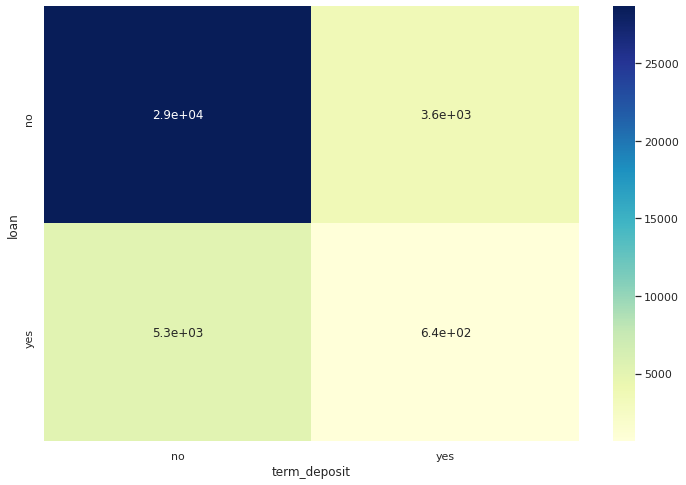

In [70]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(table_loan, annot=True, cmap="YlGnBu")

**Relationship between term_deposit and housing**

In [34]:
#Drop the unknown in housing columns
bank.drop(bank.index[bank['housing'] == 'unknown'], inplace = True)

#preview the housing column
bank['housing']

0         no
1         no
2        yes
3         no
4         no
        ... 
41183    yes
41184     no
41185    yes
41186     no
41187    yes
Name: housing, Length: 38245, dtype: object

In [35]:
#housing vs bank
table_housing= pd.crosstab(bank['housing'], bank['term_deposit'])
table_housing

term_deposit,no,yes
housing,,
no,15760,1907
yes,18227,2351


In [36]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_housing.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 3.758158182973599
Alpha: 0.050000000000000044, p-value: 0.0525504337154611


p value is greater than alpha, thus significant evidence to accept null hypothesis 

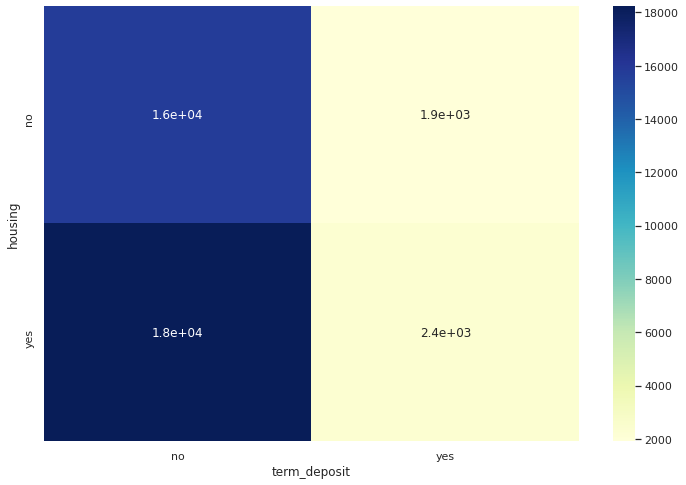

In [71]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(table_housing, annot=True, cmap="YlGnBu")

**Relationship between Term_deposit Account and Age**

In [37]:

#sample 40 records in age
table_age= bank[['age', 'term_deposit']].sample(n=40, random_state=1)

#preview the sample
table_age

,age,term_deposit
35592,33,no
32011,39,no
25663,30,no
36021,25,no
2354,36,no
30690,34,no
19444,45,no
26602,52,no
26832,33,no
18028,37,no


In [38]:
#convert term_deposit column into numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(bank['term_deposit'])
bank['term_deposit'] = label_encoder.transform(bank[['term_deposit']])
bank

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(table_age['term_deposit'])
table_age['term_deposit'] = label_encoder.transform(table_age['term_deposit'])
table_age

,age,term_deposit
35592,33,0
32011,39,0
25663,30,0
36021,25,0
2354,36,0
30690,34,0
19444,45,0
26602,52,0
26832,33,0
18028,37,0


In [40]:
#population mean of age 
a = bank['age'].mean()
a

39.86087070205256

In [41]:
#population mean of term_deposit account
b= bank['term_deposit'].mean()
b

0.11133481500849784

In [42]:
#sample mean of age
c=table_age['age'].mean()
c

38.4

In [43]:
#sample mean of term_deposit account
d=table_age['term_deposit'].mean()
d

0.1

In [44]:
#sample standard deviation
e= table_age['age'].std()
e

10.750790072338273

In [45]:
#sample standard deviation
f=table_age['term_deposit'].std()
f

0.3038218101250999

In [46]:
# point estimation

# population.mean() - sample.mean()

bank['age'].mean() - table_age['age'].mean()

1.46087070205256

In [47]:
# Perform a two sample z test
from statsmodels.stats.weightstats import ztest
zscore, p = ztest(x1 = table_age[table_age['term_deposit']==1]['age'].values, x2=table_age[table_age['term_deposit']==0]['age'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: -1.3680988997976569, p-value: 0.17128112105634086


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [48]:
#interpretation of the p value

# alpha value is 0.05 or 5%

if p < 0.05:   
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [49]:
import math
sample_mean = table_age['term_deposit'].mean()

# Get the z-critical value
z_critical = stats.norm.ppf(q = 0.975)

# Check the z-critical value
print("z-critical value:")              
print(z_critical)

# Get the population standard deviation
pop_stdev = bank['age'].std() 

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(-1.0721845906295608, 1.272184590629561)


Relationship between term_deposit and call duration

In [50]:
#sample 40 records in age
table_duration= bank[['duration', 'term_deposit']].sample(n=40, random_state=1)

#preview the sample
table_duration

,duration,term_deposit
35592,287,0
32011,123,0
25663,84,0
36021,500,0
2354,136,0
30690,106,0
19444,186,0
26602,139,0
26832,119,0
18028,312,0


In [51]:
#population mean of age 
a = bank['duration'].mean()
a

258.2075826905478

In [52]:
#population mean of term_deposit account
b= bank['term_deposit'].mean()
b

0.11133481500849784

In [53]:
#sample mean of duration
c=table_duration['duration'].mean()
c

285.9

In [54]:
#sample mean of term_deposit account
d=table_duration['term_deposit'].mean()
d

0.1

In [55]:
#sample standard deviation
e= table_age['age'].std()
e

10.750790072338273

In [56]:
#sample standard deviation
f=table_duration['term_deposit'].std()
f

0.3038218101250999

In [57]:
# population.mean() - sample.mean()

bank['age'].mean() - table_age['age'].mean()

1.46087070205256

In [59]:
# Perform a two sample z test
from statsmodels.stats.weightstats import ztest
zscore, p = ztest(x1 = table_duration[table_duration['term_deposit']==1]['duration'].values, x2=table_duration[table_duration['term_deposit']==0]['duration'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: 2.8602300499098128, p-value: 0.004233337935947245


In [60]:
#interpretation of the p value

# alpha value is 0.05 or 5%

if p < 0.05:   
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

 we are rejecting null hypothesis


In [61]:
import math
sample_mean = table_duration['term_deposit'].mean()

# Get the z-critical value
z_critical = stats.norm.ppf(q = 0.975)

# Check the z-critical value
print("z-critical value:")              
print(z_critical)

# Get the population standard deviation
pop_stdev = bank['duration'].std() 

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(-29.4957313333587, 29.695731333358705)
